In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from utils import *


2023-09-23 19:08:28.226386: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-23 19:08:28.267675: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-23 19:08:28.268254: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 19:08:29.085815: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes = load_mood_datasets()


<h3>This data set contains 600 training data comprising of 64 X 64 colored images of happy and sad faces. 160 test data and binary labels that denotes 1 with happiness and 0 with sadness. <br><br> These data were trained using 2 different models- one a densely connected neural network with 3 layers and a convNet</h3>

<h1>DATA VISUALIZATION</h1>

In [4]:
train_set_x_orig.shape

(600, 64, 64, 3)

In [18]:

def show_mood (index):
    
    plt.imshow(train_set_x_orig[index])
    label = train_set_y_orig[:,index][0]
    print("happy" if label == 1 else "sad")

sad


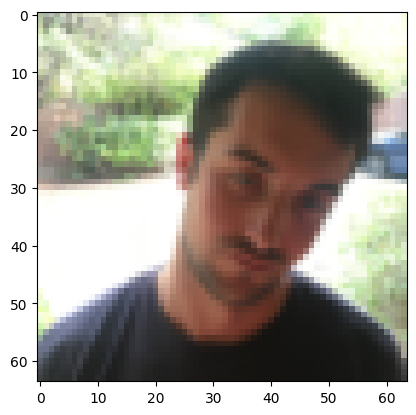

In [20]:
show_mood(0)

<h1>DATA PREPARATION</h1>

In [ ]:
#Both labels were transposed from 1 X 600 dimension to 600 x 1
#The input data were pre-processed (rescaled and flattened) with inbuilt keras layers

y_test = test_set_y_orig.T
y_train = train_set_y_orig.T

<h1>MODEL 1 - DENSE NETWORK</h1>

In [3]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Rescaling(1./255, input_shape=(64, 64, 3)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation="relu"))
model1.add(tf.keras.layers.Dense(128, activation="relu"))
model1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

2023-09-23 19:08:41.658898: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 64, 64, 3)         0         
                                                                 
 flatten (Flatten)           (None, 12288)             0         
                                                                 
 dense (Dense)               (None, 128)               1572992   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,589,633
Trainable params: 1,589,633
Non-trainable params: 0
_________________________________________________________________


In [4]:
model1.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["acc"]
)

In [5]:
history = model1.fit(
    train_set_x_orig, 
    y_train, 
    epochs=30, 
    batch_size=64, 
    validation_data=(test_set_x_orig, y_test))

Epoch 1/30
10/10 [==============================] - 1s 45ms/step - loss: 1.9587 - acc: 0.4567 - val_loss: 0.7084 - val_acc: 0.5533
Epoch 2/30
10/10 [==============================] - 0s 33ms/step - loss: 0.6857 - acc: 0.5600 - val_loss: 0.6068 - val_acc: 0.6200
Epoch 3/30
10/10 [==============================] - 0s 31ms/step - loss: 0.5944 - acc: 0.6800 - val_loss: 0.5519 - val_acc: 0.6933
Epoch 4/30
10/10 [==============================] - 0s 31ms/step - loss: 0.4894 - acc: 0.7733 - val_loss: 0.5119 - val_acc: 0.7133
Epoch 5/30
10/10 [==============================] - 0s 31ms/step - loss: 0.4449 - acc: 0.8050 - val_loss: 0.4938 - val_acc: 0.7600
Epoch 6/30
10/10 [==============================] - 0s 31ms/step - loss: 0.4120 - acc: 0.7917 - val_loss: 0.4657 - val_acc: 0.7333
Epoch 7/30
10/10 [==============================] - 0s 33ms/step - loss: 0.3838 - acc: 0.8367 - val_loss: 0.4269 - val_acc: 0.8000
Epoch 8/30
10/10 [==============================] - 0s 31ms/step - loss: 0.3627 - a

<h1>RESULT VISUALIZATION - MODEL 1</h1>

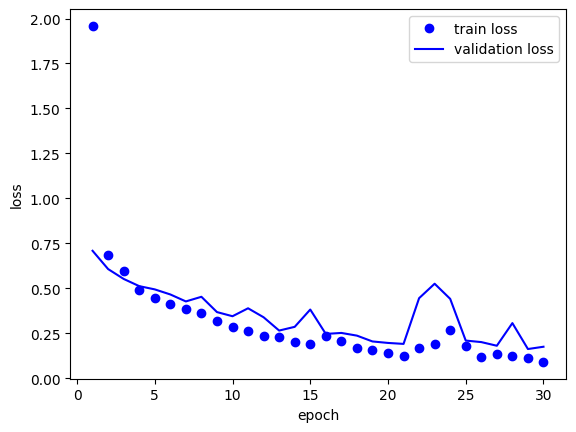

In [11]:
#Loss plot for train and validation data
plot(history.history,9)

In [ ]:
#train and validation accuracy plot
plot(history.history)

<h1>MODEL 1 - CONVNET</h1>

In [12]:
#model1 which uses densely connected layers has 

In [18]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Rescaling(1./255, input_shape=(64, 64, 3)))
model2.add(tf.keras.layers.ZeroPadding2D(padding=3))
model2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(7,7), strides=1))
model2.add(tf.keras.layers.BatchNormalization(axis=3))
model2.add(tf.keras.layers.ReLU())
model2.add(tf.keras.layers.MaxPool2D())
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [19]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 64, 64, 3)         0         
                                                                 
 zero_padding2d_2 (ZeroPaddi  (None, 70, 70, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization_2 (Batc  (None, 64, 64, 32)       128       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)      

In [20]:
model2.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["acc"])

In [21]:
history2 = model2.fit(
    train_set_x_orig, 
    y_train, 
    epochs=30, 
    batch_size=64, 
    validation_data=(test_set_x_orig, y_test))

Epoch 1/30
10/10 [==============================] - 3s 207ms/step - loss: 2.6709 - acc: 0.5583 - val_loss: 0.7799 - val_acc: 0.5800
Epoch 2/30
10/10 [==============================] - 2s 187ms/step - loss: 0.7582 - acc: 0.7283 - val_loss: 0.6691 - val_acc: 0.5600
Epoch 3/30
10/10 [==============================] - 2s 191ms/step - loss: 0.3641 - acc: 0.8417 - val_loss: 0.9011 - val_acc: 0.5533
Epoch 4/30
10/10 [==============================] - 2s 190ms/step - loss: 0.2747 - acc: 0.8817 - val_loss: 0.7902 - val_acc: 0.5467
Epoch 5/30
10/10 [==============================] - 2s 183ms/step - loss: 0.2067 - acc: 0.9133 - val_loss: 0.6782 - val_acc: 0.5667
Epoch 6/30
10/10 [==============================] - 2s 184ms/step - loss: 0.1490 - acc: 0.9433 - val_loss: 0.5911 - val_acc: 0.5933
Epoch 7/30
10/10 [==============================] - 2s 184ms/step - loss: 0.1352 - acc: 0.9517 - val_loss: 0.4913 - val_acc: 0.6733
Epoch 8/30
10/10 [==============================] - 2s 203ms/step - loss: 0.

<h1>RESULT VISUALIZATION - MODEL 2</h1>

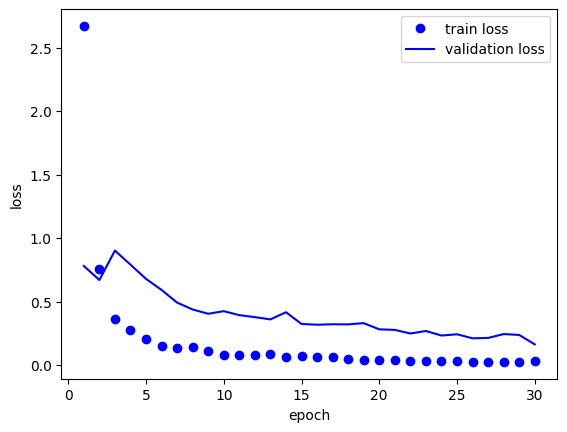

In [23]:
#train and validation loss
plot(history2.history, 2)

In [ ]:
#train and validation accuracy plot
plot(history2.history)